In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
emp_df=pd.read_csv("HR_comma_sep.csv")

In [3]:
emp_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
emp_df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [6]:
df=emp_df.copy()

In [7]:
df.duplicated().sum()

np.int64(3008)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

<Axes: >

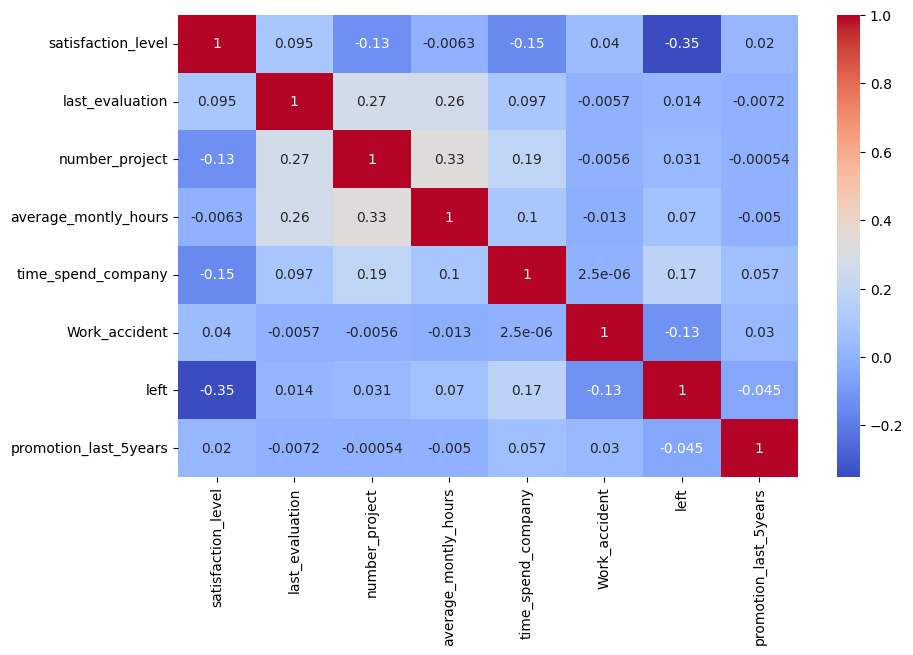

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

Draw the distribution plot of:


1.   Employee Satisfaction (use column satisfaction_level)
2.   Employee Evaluation (use column last_evaluation)
3.   Employee Average Monthly Hours (use column average_montly_hours)





In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Employee Satisfaction Level')

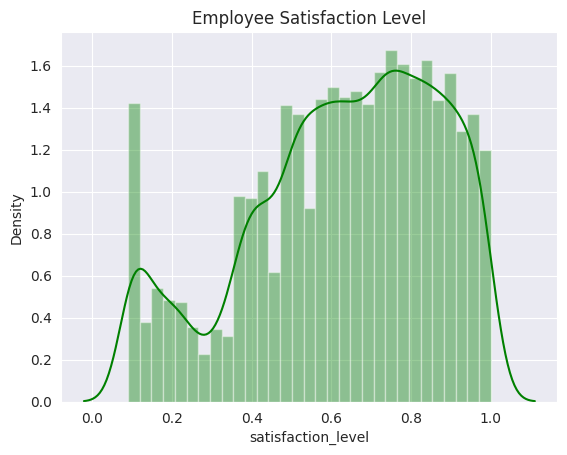

In [14]:
sns.set_style('darkgrid')
sns.distplot(df['satisfaction_level'],color='green')
plt.title("Employee Satisfaction Level")

Text(0.5, 1.0, 'Employee last evaluation')

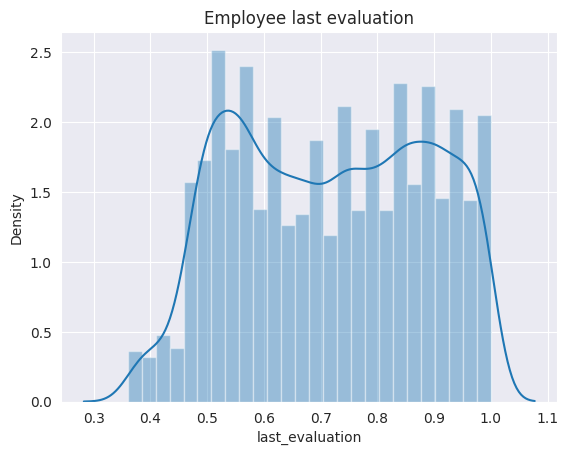

In [15]:
sns.distplot(df['last_evaluation'])
plt.title("Employee last evaluation")

Text(0.5, 1.0, 'Employee Average Monthly Hours')

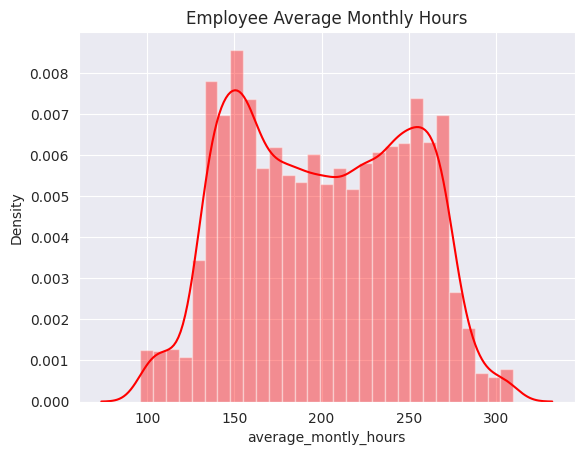

In [16]:
sns.distplot(df['average_montly_hours'],color='red')
plt.title("Employee Average Monthly Hours")

Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

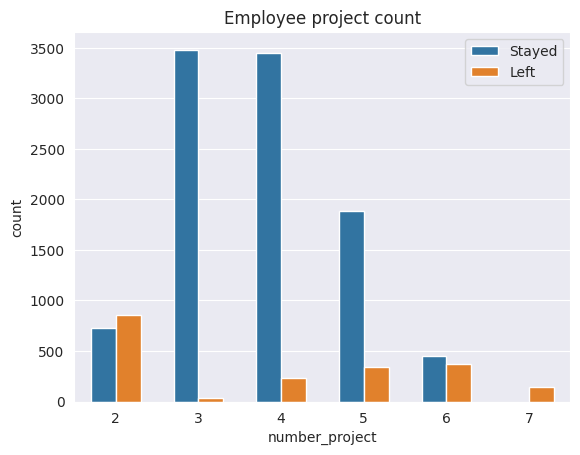

In [17]:
sns.countplot(x='number_project',hue='left',data=df,width=0.6)
plt.title('Employee project count')
plt.legend(labels=['Stayed','Left'])

**INFERENCE** Employees who are doing too less projects or too more projects leave the company and those doing  moderate number of projects stay in the company


In [18]:
selected_columns=['satisfaction_level', 'last_evaluation','left']
left_emp=df[df['left']==1][selected_columns]
left_emp

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
1995,0.37,0.57,1
1996,0.11,0.92,1
1997,0.41,0.53,1
1998,0.84,0.96,1


In [19]:
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=123)
left_emp['cluster']=kmeans.fit_predict(left_emp)
left_emp

,satisfaction_level,last_evaluation,left,cluster
0,0.38,0.53,1,2
1,0.80,0.86,1,1
2,0.11,0.88,1,0
3,0.72,0.87,1,1
4,0.37,0.52,1,2
...,...,...,...,...
1995,0.37,0.57,1,2
1996,0.11,0.92,1,0
1997,0.41,0.53,1,2
1998,0.84,0.96,1,1


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

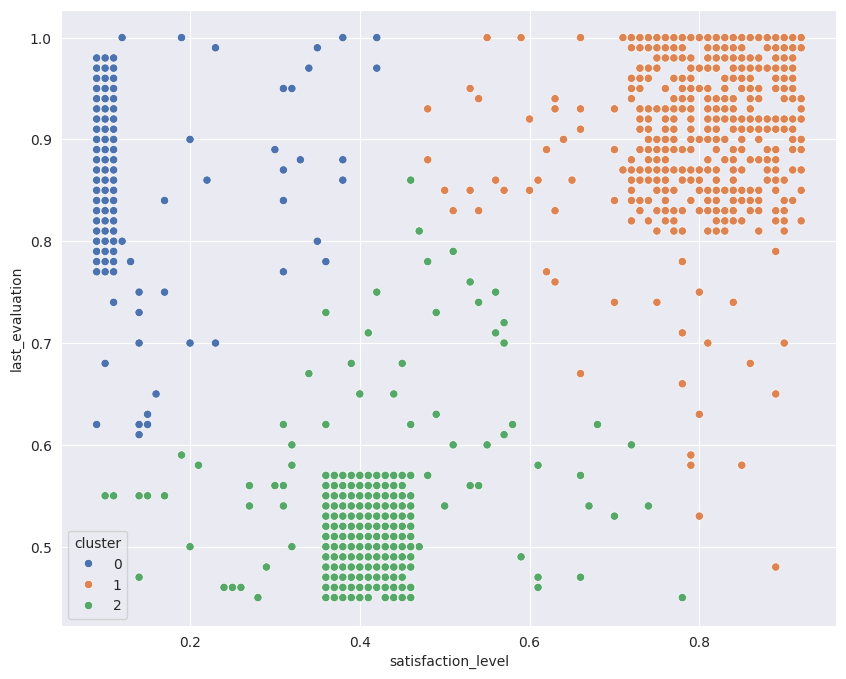

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='satisfaction_level',y='last_evaluation',hue='cluster',data=left_emp,palette='deep')

Handle the left Class Imbalance using the SMOTE technique.

4.1.
Pre-process the data by converting categorical columns to numerical columns by:


1. Separating categorical variables and numeric variables
2. Applying get_dummies() to the categorical variables
3. Combining categorical variables and numeric variables


4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [23]:
cat_var=['sales','salary']
num_var=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']

In [24]:
cat_df=pd.get_dummies(data=df,columns=cat_var,drop_first=True,dtype=int)
cat_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
final_df=pd.concat([df[num_var],cat_df,df['left']],axis=1)
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,number_project,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0.38,0.53,2,...,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0.80,0.86,5,...,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0.11,0.88,7,...,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0.72,0.87,5,...,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0.37,0.52,2,...,0,0,0,0,1,0,0,1,0,1


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   satisfaction_level     11991 non-null  float64
 8   last_evaluation        11991 non-null  float64
 9   number_project         11991 non-null  int64  
 10  average_montly_hours   11991 non-null  int64  
 11  time_spend_company     11991 non-null  int64  
 12  Work_accident          11991 non-null  int64  
 13  left                   11991 non-null  int64  
 14  promotion_last_5years  11991 non-null  int64  
 15  sales_R

In [27]:
round(df.left.value_counts(1),2)

,proportion
left,
0,0.83
1,0.17


In [28]:
X=cat_df.drop(['left'],axis=1)
y=cat_df['left']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

**APPLYING SMOTE**

In [30]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=123,sampling_strategy=1.0)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [31]:
print(f"the original shape is : {X_train.shape,y_train.shape}")
print(f"the resampled shape is : {X_train_smote.shape,y_train_smote.shape}")

the original shape is : ((9592, 18), (9592,))
the resampled shape is : ((15982, 18), (15982,))


Perform 5-fold cross-validation model training and evaluate performance.

**5.1**.Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

**5.2**.Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

**5.3**. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

**LOGISTIC REGRESSION**

In [63]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [62]:
y_pred=classifier.predict(X_train_smote)
from sklearn.metrics import classification_report
print(classification_report(y_train_smote,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7991
           1       0.98      0.94      0.96      7991

    accuracy                           0.96     15982
   macro avg       0.96      0.96      0.96     15982
weighted avg       0.96      0.96      0.96     15982



In [38]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=classifier,X=X_train_smote,y=y_train_smote,cv=5)
print(f"accuracy is : {scores.mean()*100:.2f} %")

accuracy is : 82.30 %


Since the model doesnt perform better we are doing a 10 fold cv

In [39]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=classifier,X=X_train_smote,y=y_train_smote,cv=10)
print(f"accuracy is : {scores.mean()*100:.2f} % ")

accuracy is : 82.25 % 


Hence the model is not overfitting

Text(0, 0.5, 'True Positive Rate')

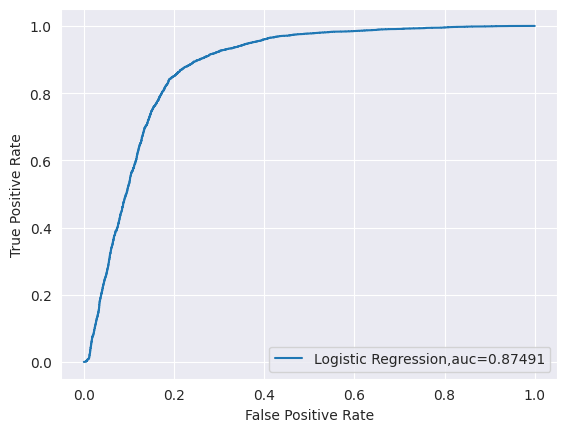

In [69]:
from sklearn import metrics
y_pred_proba=classifier.predict_proba(X_train_smote)[:,1]
fpr,tpr,_=metrics.roc_curve(y_train_smote,y_pred_proba)
auc=metrics.roc_auc_score(y_train_smote,y_pred_proba)
plt.plot(fpr,tpr,label=f"Logistic Regression,auc={auc:.5f}")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**RANDOM FOREST CLASSIFIER**

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier=RandomForestClassifier()
rfclassifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [54]:
y_pred_rf=rfclassifier.predict(X_train_smote)
print(classification_report(y_train_smote,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7991
           1       1.00      1.00      1.00      7991

    accuracy                           1.00     15982
   macro avg       1.00      1.00      1.00     15982
weighted avg       1.00      1.00      1.00     15982



In [55]:
scores=cross_val_score(estimator=rfclassifier,X=X_train_smote,y=y_train_smote,cv=5)
print(f"accuracy is : {scores.mean()*100:.2f} %")

accuracy is : 97.28 %


Text(0, 0.5, 'True Positive Rate')

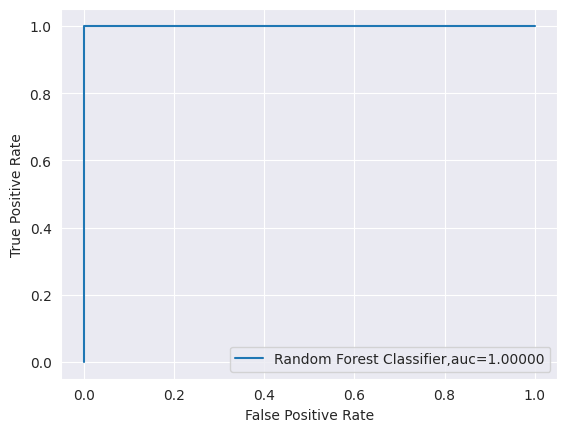

In [70]:
y_pred_proba_rf=rfclassifier.predict_proba(X_train_smote)[:,1]
fpr,tpr,_=metrics.roc_curve(y_train_smote,y_pred_rf)
auc=metrics.roc_auc_score(y_train_smote,y_pred_proba_rf)
plt.plot(fpr,tpr,label=f"Random Forest Classifier,auc={auc:.5f}")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**GRADIENT BOOSTING CLASSIFIER**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbclassifier=GradientBoostingClassifier()
gbclassifier.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier()

In [59]:
y_pred_gb=gbclassifier.predict(X_train_smote)
print(classification_report(y_train_smote,y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7991
           1       0.98      0.94      0.96      7991

    accuracy                           0.96     15982
   macro avg       0.96      0.96      0.96     15982
weighted avg       0.96      0.96      0.96     15982



In [60]:
scores=cross_val_score(estimator=gbclassifier,X=X_train_smote,y=y_train_smote,cv=5)
print(f"accuracy is : {scores.mean()*100:.2f} %")

accuracy is : 95.70 %


[]

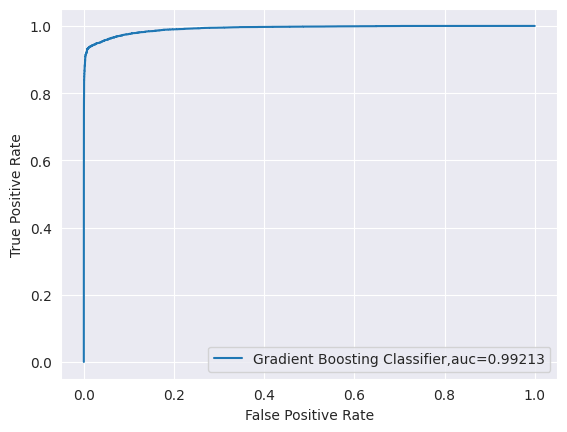

In [71]:
y_pred_proba_gb=gbclassifier.predict_proba(X_train_smote)[:,1]
fpr,tpr,_=metrics.roc_curve(y_train_smote,y_pred_proba_gb)
auc=metrics.roc_auc_score(y_train_smote,y_pred_proba_gb)
plt.plot(fpr,tpr,label=f"Gradient Boosting Classifier,auc={auc:.5f}")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()